<a href="https://colab.research.google.com/github/Mehekjain05/Machine-Learning-Models/blob/main/diabetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we aim to develop a machine learning model that can predict diabetes based on their clinical and demographic data. We will use a dataset containing information about patients' age, BMI, blood pressure, insulin levels, and other factors to train and test the model.

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/diabetes.csv")

In [ ]:
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

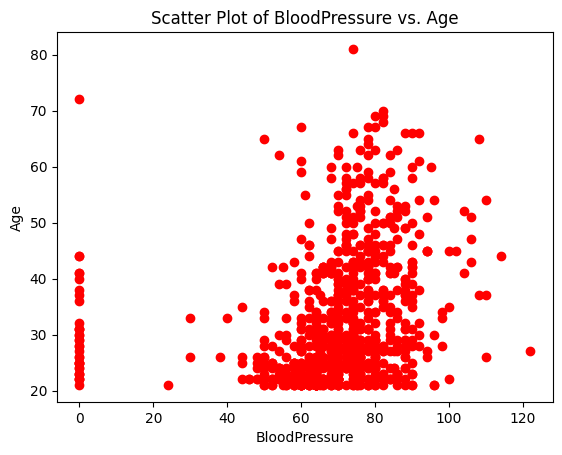

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['BloodPressure'], data['Age'],c='r')

plt.xlabel('BloodPressure')
plt.ylabel('Age')
plt.title('Scatter Plot of BloodPressure vs. Age')

plt.show()

A scatterplot is a used to visualize or explore the relationship between the variables

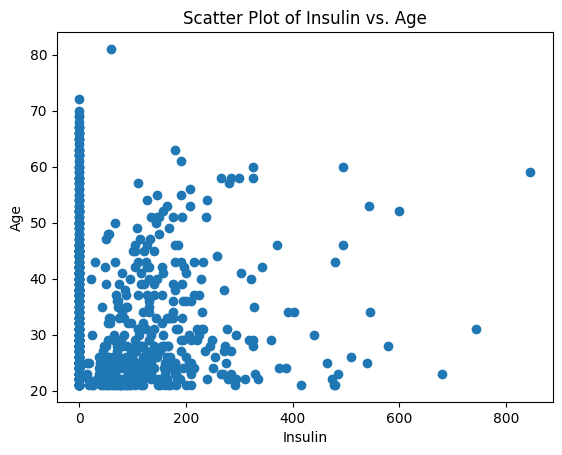

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['Insulin'], data['Age'])

plt.xlabel('Insulin')
plt.ylabel('Age')
plt.title('Scatter Plot of Insulin vs. Age')

plt.show()

HeatMap to identify patterns and relationships between variables.

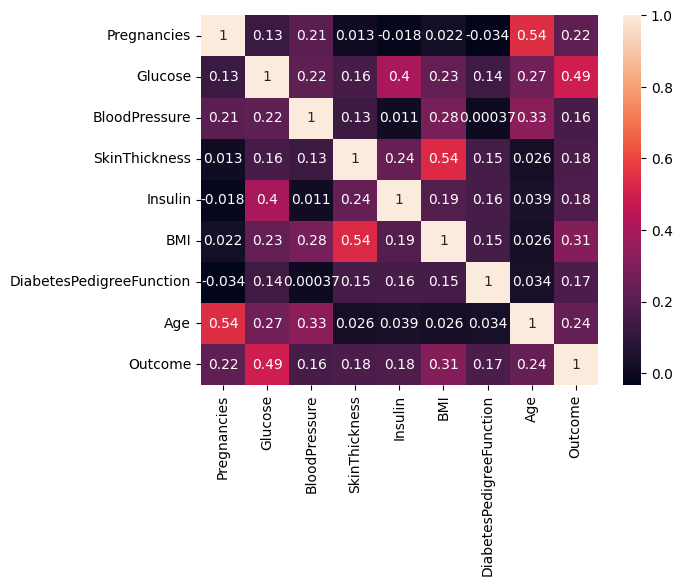

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True )
plt.show()

Since BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
Will replace zero values with the mean of the *column* 

In [ ]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 A pie chart could be used to represent the distribution of target variable i.e person is diabetic or not 

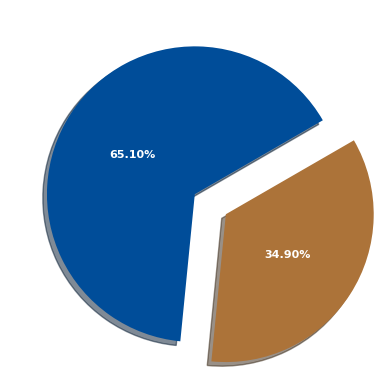

In [ ]:
plt.pie(data['Outcome'].value_counts(),
                   explode      = [0.0, 0.25], 
                   startangle   = 30, 
                   shadow       = True, 
                   colors       = ['#004d99', '#ac7339'], 
                   textprops    = {'fontsize': 8, 'fontweight': 'bold', 'color': 'white'},
                   pctdistance  = 0.50, autopct = '%1.2f%%'
                  );

<Axes: xlabel='Age', ylabel='Count'>

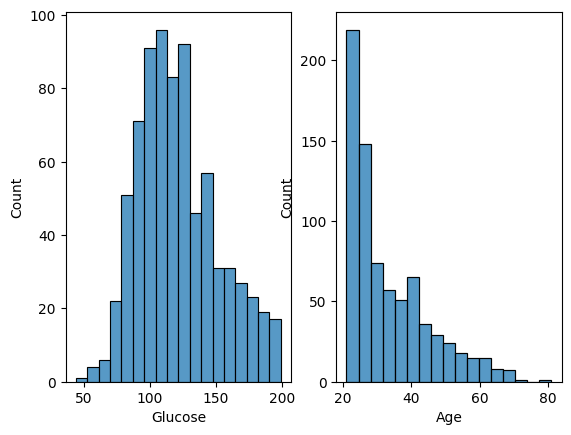

In [ ]:
plt.subplot(1,2,1)
sns.histplot(data['Glucose'])
plt.subplot(1,2,2)
sns.histplot(data['Age'])

<Axes: xlabel='Age', ylabel='Count'>

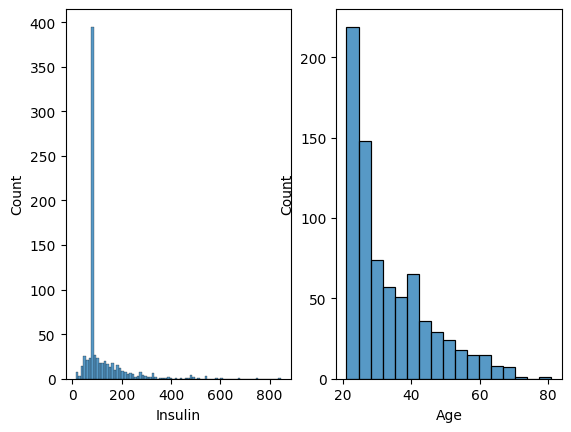

In [ ]:
plt.subplot(1,2,1)
sns.histplot(data['Insulin'])
plt.subplot(1,2,2)
sns.histplot(data['Age'])

Boxplot to identify the outliers


<Axes: >

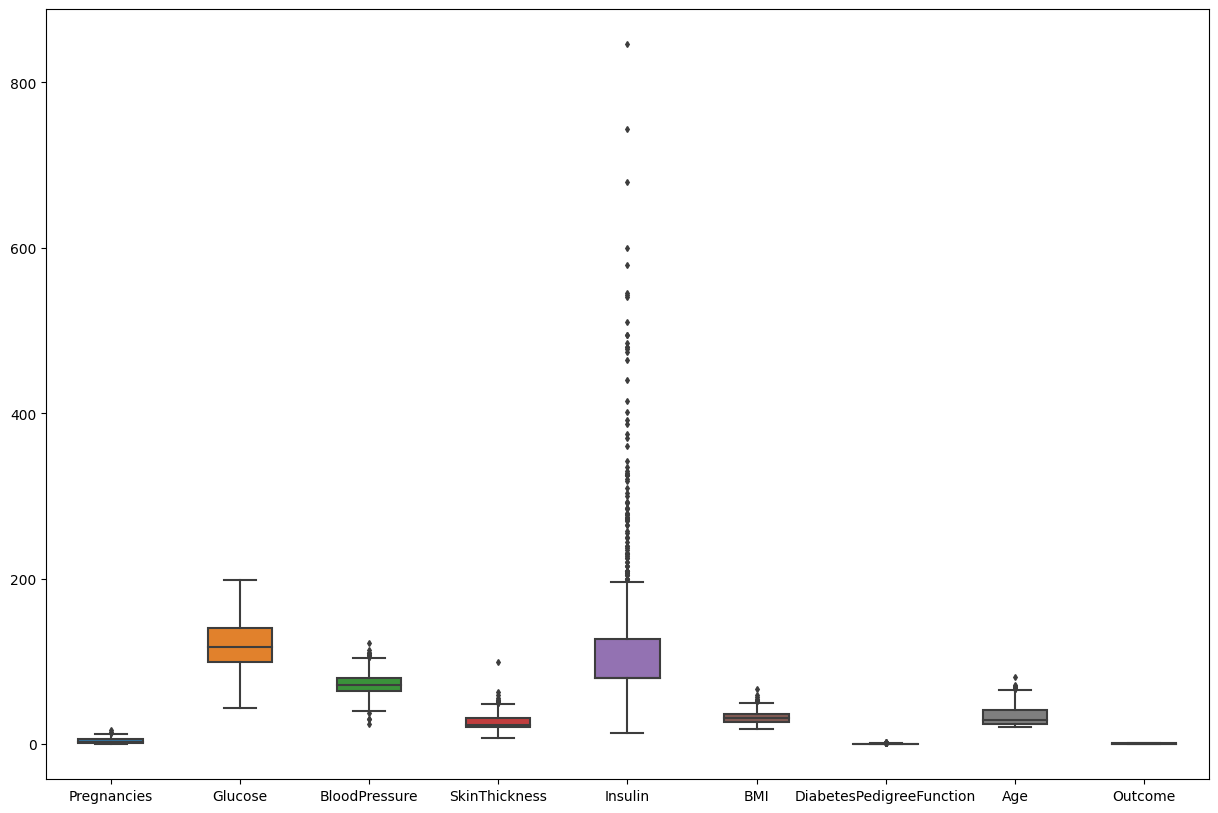

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [ ]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [ ]:
variables = ["SkinThickness", "Insulin"]
data[variables] = data[variables].replace(0,np.NaN)
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.533225
BloodPressure               0.173050
SkinThickness               1.226670
Insulin                     3.291825
BMI                         0.601103
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [ ]:
data.duplicated().sum()

0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=20)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [ ]:
logi_classifier = LogisticRegression()

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
logi_classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred_test = logi_classifier.predict(X_test_scaled)

In [ ]:
y_pred_test

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test

143    1
14     1
504    0
557    0
736    0
      ..
599    0
379    0
615    0
321    1
553    0
Name: Outcome, Length: 192, dtype: int64

In [ ]:
print(accuracy_score(y_pred_test,y_test))


0.7708333333333334


Now will test the accuracy using  Random Forest and compare the accuracy rate


In [ ]:
clf = RandomForestClassifier(max_depth=2,random_state=42) 

In [ ]:
clf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [ ]:
pred_y = clf.predict(X_test_scaled)
print(pred_y)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy, precision, recall, and F1 score of the model
accuracy = accuracy_score(y_test,pred_y)
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
f1 = f1_score(y_test, pred_y)

print(f'The accuracy of the Random Forest classifier is: {accuracy:.2f}')
print(f'The precision of the Random Forest classifier is: {precision:.2f}')
print(f'The recall of the Random Forest classifier is: {recall:.2f}')
print(f'The F1 score of the Random Forest classifier is: {f1:.2f}')


The accuracy of the Random Forest classifier is: 0.76
The precision of the Random Forest classifier is: 0.72
The recall of the Random Forest classifier is: 0.42
The F1 score of the Random Forest classifier is: 0.53
